In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
df = pd.read_csv("/home/hadiii/python3/FuelConsumption.csv")
display(df.head(10))
display(df.describe())

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
display(cdf.head(10))
display(cdf.describe())

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

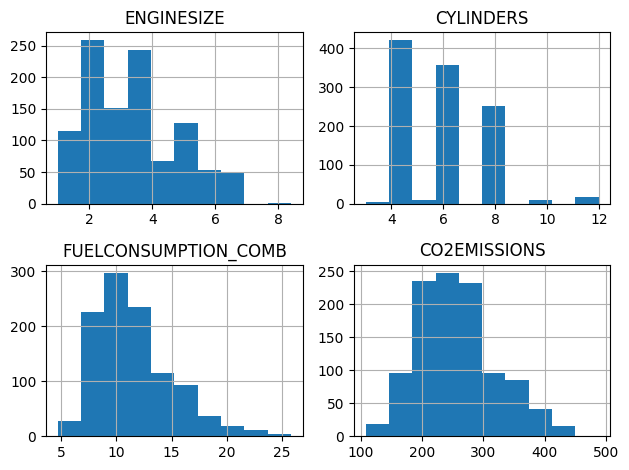

In [33]:
viz = cdf.hist()
plt.tight_layout()
plt.show

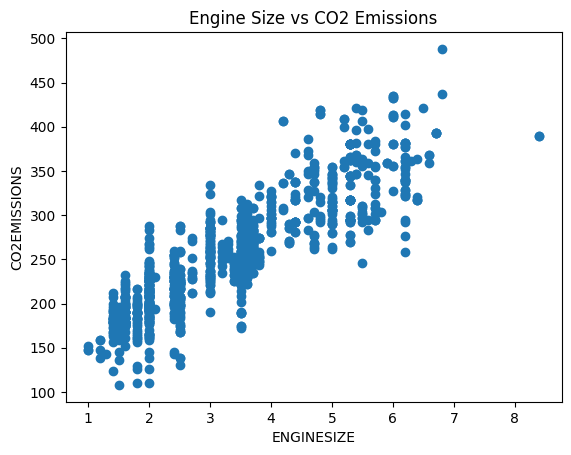

In [34]:
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'])
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("Engine Size vs CO2 Emissions")
plt.show()

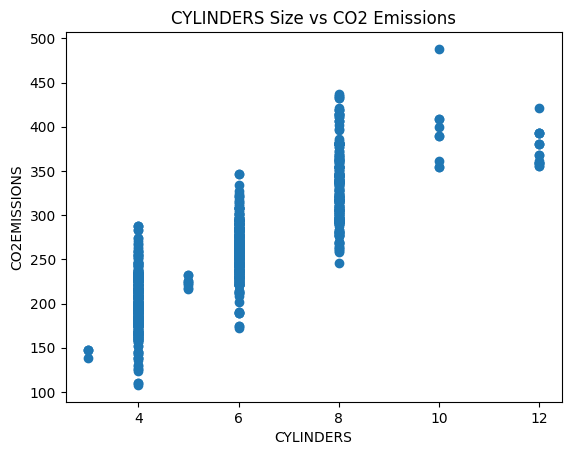

In [36]:
plt.scatter(cdf['CYLINDERS'], cdf['CO2EMISSIONS'])
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.title("CYLINDERS Size vs CO2 Emissions")
plt.show()

In [39]:
np.random.seed(42)
train, test = train_test_split(cdf, test_size=0.2, random_state=42)

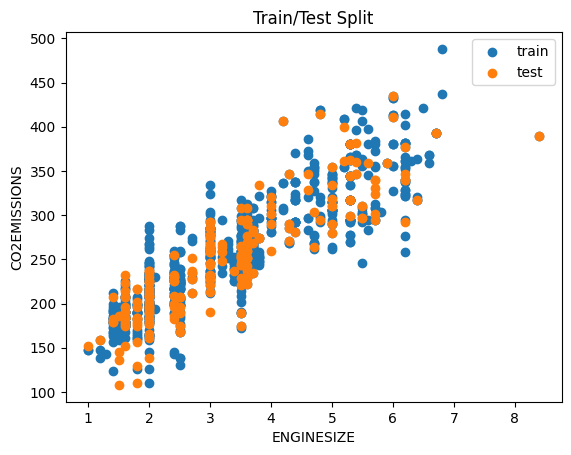

In [40]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], label='train', alpha=1)
plt.scatter(test['ENGINESIZE'], test['CO2EMISSIONS'], label='test', alpha=1)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.legend()
plt.title("Train/Test Split")
plt.show()

In [41]:
X_train = train[['ENGINESIZE']].values
y_train = train[['CO2EMISSIONS']].values
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Coefficient (slope):", regr.coef_.ravel()[0])
print("Intercept:", regr.intercept_.ravel()[0])

Coefficient (slope): 38.992978724434074
Intercept: 126.28970217408721


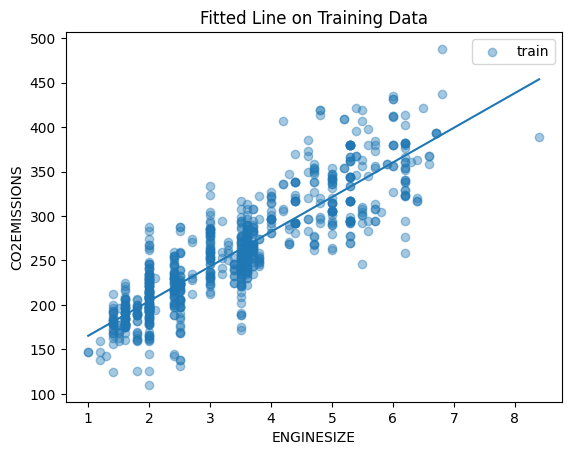

In [42]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], label='train', alpha=0.4)
x_line = np.linspace(train['ENGINESIZE'].min(), train['ENGINESIZE'].max(), 100).reshape(-1,1)
y_line = regr.predict(x_line)
plt.plot(x_line, y_line, '-')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("Fitted Line on Training Data")
plt.legend()
plt.show()

In [43]:
X_test  = test[['ENGINESIZE']].values
y_test  = test[['CO2EMISSIONS']].values
y_pred  = regr.predict(X_test)

r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2:  {r2:.3f}")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R^2:  0.762
MAE:  24.10
RMSE: 31.40
